# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/11_tensor_operations_einsum`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/11_tensor_operations_einsum/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Introduction to Tensor Operations and Einstein Notation

In this notebook, we'll explore tensor operations and Einstein notation, which provides a powerful and concise way to express complex tensor operations. Einstein notation allows us to write complex tensor operations in a compact form by implicitly summing over repeated indices.

## What are Tensors?

Tensors are generalizations of vectors and matrices to higher dimensions:
- Scalars are 0-rank tensors (single values)
- Vectors are 1-rank tensors (arrays with 1 dimension)
- Matrices are 2-rank tensors (arrays with 2 dimensions)
- Higher-rank tensors have 3+ dimensions

Tensor operations become increasingly complex as dimensionality grows, which is why Einstein notation is so valuable.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set the style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")


## Visualizing Tensors of Different Ranks

Let's visualize tensors of different ranks to build intuition:


In [2]:
# Scalar (rank 0)
scalar = torch.tensor(5.0)
print(f"Scalar (rank 0):")
print(f"Value: {scalar.item()}")
print(f"Shape: {scalar.shape}")
print()

# Vector (rank 1)
vector = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(f"Vector (rank 1):")
print(f"Values: {vector}")
print(f"Shape: {vector.shape}")
print()

# Matrix (rank 2)
matrix = torch.tensor([[1.0, 2.0, 3.0], 
                       [4.0, 5.0, 6.0],
                       [7.0, 8.0, 9.0]])
print(f"Matrix (rank 2):")
print(f"Values:\n{matrix}")
print(f"Shape: {matrix.shape}")
print()

# 3D tensor (rank 3)
tensor_3d = torch.tensor([[[1.0, 2.0], [3.0, 4.0]],
                         [[5.0, 6.0], [7.0, 8.0]]])
print(f"3D Tensor (rank 3):")
print(f"Values:\n{tensor_3d}")
print(f"Shape: {tensor_3d.shape}")
print()

# 4D tensor (rank 4) - Mini-batch of images (batch, channels, height, width)
tensor_4d = torch.rand(2, 3, 4, 4)  # 2 samples, 3 channels, 4x4 images
print(f"4D Tensor (rank 4):")
print(f"Shape: {tensor_4d.shape}")
print(f"Number of elements: {tensor_4d.numel()}")


Scalar (rank 0):
Value: 5.0
Shape: torch.Size([])

Vector (rank 1):
Values: tensor([1., 2., 3., 4., 5.])
Shape: torch.Size([5])

Matrix (rank 2):
Values:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Shape: torch.Size([3, 3])

3D Tensor (rank 3):
Values:
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
Shape: torch.Size([2, 2, 2])

4D Tensor (rank 4):
Shape: torch.Size([2, 3, 4, 4])
Number of elements: 96


Let's visualize our vector, matrix, and 3D tensor to better understand their structure:


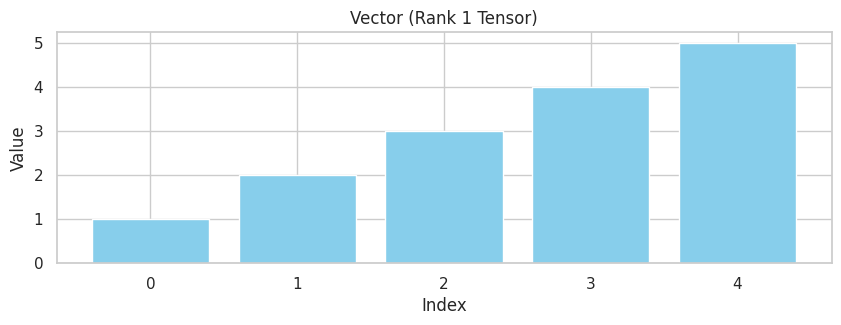

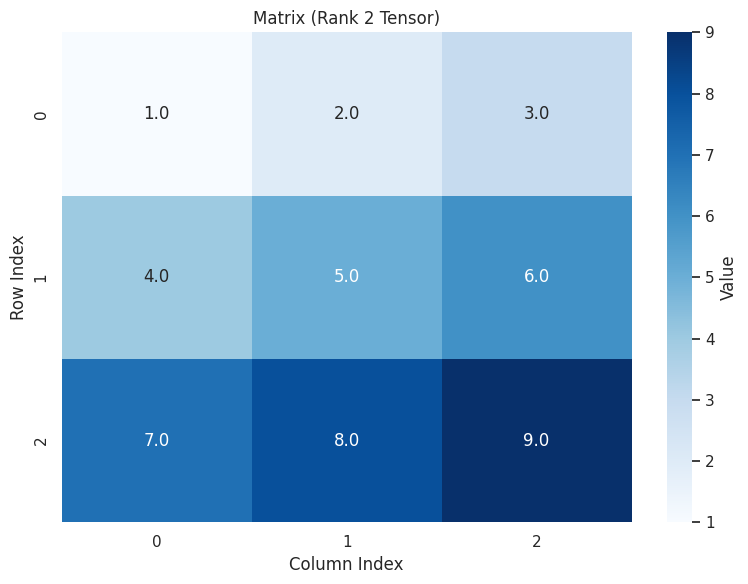

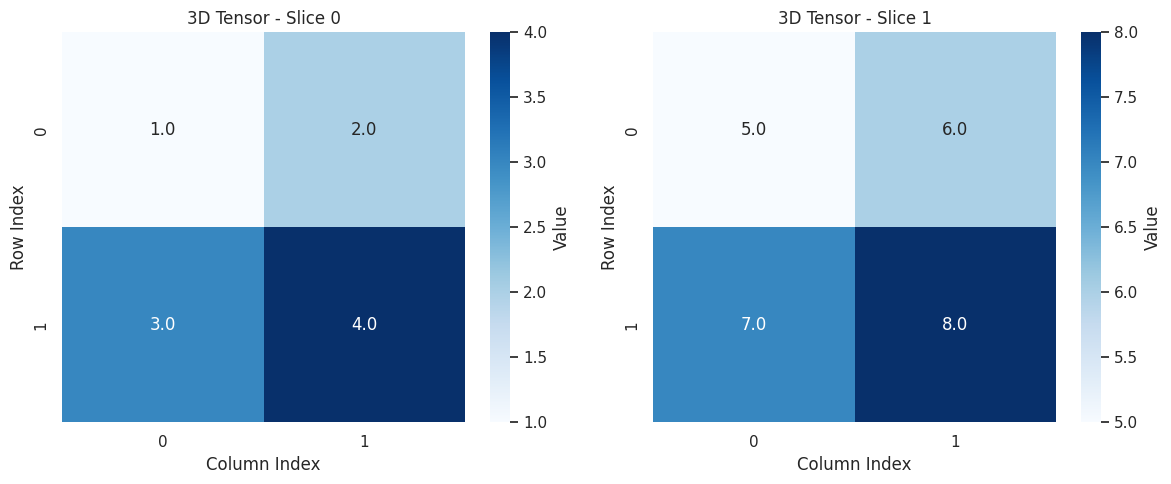

In [3]:
# Plot vector
plt.figure(figsize=(10, 3))
plt.bar(range(len(vector)), vector.numpy(), color='skyblue')
plt.xticks(range(len(vector)))
plt.title('Vector (Rank 1 Tensor)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Plot matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix.numpy(), annot=True, cmap='Blues', fmt=".1f", 
            cbar_kws={'label': 'Value'})
plt.title('Matrix (Rank 2 Tensor)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.tight_layout()
plt.show()

# Plot 3D tensor
fig = plt.figure(figsize=(12, 5))

# First slice
ax1 = fig.add_subplot(121)
sns.heatmap(tensor_3d[0].numpy(), annot=True, cmap='Blues', fmt=".1f",
            cbar_kws={'label': 'Value'})
ax1.set_title('3D Tensor - Slice 0')
ax1.set_xlabel('Column Index')
ax1.set_ylabel('Row Index')

# Second slice
ax2 = fig.add_subplot(122)
sns.heatmap(tensor_3d[1].numpy(), annot=True, cmap='Blues', fmt=".1f",
            cbar_kws={'label': 'Value'})
ax2.set_title('3D Tensor - Slice 1')
ax2.set_xlabel('Column Index')
ax2.set_ylabel('Row Index')

plt.tight_layout()
plt.show()


## Tensor Indexing and Slicing

Understanding how to access elements in tensors is fundamental. Let's practice with some examples:


In [4]:
# Using our previously defined tensors
print("Vector element at index 2:", vector[2])
print("Matrix element at row 1, col 2:", matrix[1, 2])
print("3D tensor element at indices (1,0,1):", tensor_3d[1, 0, 1])
print()

# Slicing examples
print("Vector slice [1:4]:", vector[1:4])
print()

print("Matrix row 1:", matrix[1])
print("Matrix column 1:", matrix[:, 1])
print("Matrix slice [0:2, 1:3]:\n", matrix[0:2, 1:3])
print()

print("3D tensor slice [0, :, :]:\n", tensor_3d[0, :, :])
print("3D tensor slice [:, 1, :]:\n", tensor_3d[:, 1, :])
print("3D tensor slice [:, :, 0]:\n", tensor_3d[:, :, 0])


Vector element at index 2: tensor(3.)
Matrix element at row 1, col 2: tensor(6.)
3D tensor element at indices (1,0,1): tensor(6.)

Vector slice [1:4]: tensor([2., 3., 4.])

Matrix row 1: tensor([4., 5., 6.])
Matrix column 1: tensor([2., 5., 8.])
Matrix slice [0:2, 1:3]:
 tensor([[2., 3.],
        [5., 6.]])

3D tensor slice [0, :, :]:
 tensor([[1., 2.],
        [3., 4.]])
3D tensor slice [:, 1, :]:
 tensor([[3., 4.],
        [7., 8.]])
3D tensor slice [:, :, 0]:
 tensor([[1., 3.],
        [5., 7.]])


## Basic Tensor Operations

Before we dive into Einstein notation, let's review basic tensor operations that we can express more concisely with Einstein notation:


In [5]:
# Element-wise operations
a = torch.tensor([1, 2, 3, 4])
b = torch.tensor([5, 6, 7, 8])

# Addition
print("Element-wise addition:\n", a + b)

# Multiplication (Hadamard product)
print("Element-wise multiplication:\n", a * b)

# Matrix multiplication
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# Matrix multiplication using matmul
C = torch.matmul(A, B)
print("\nMatrix multiplication (A @ B):\n", C)

# Matrix-vector multiplication
v = torch.tensor([1, 2])
result = torch.matmul(A, v)
print("\nMatrix-vector multiplication (A @ v):\n", result)


Element-wise addition:
 tensor([ 6,  8, 10, 12])
Element-wise multiplication:
 tensor([ 5, 12, 21, 32])

Matrix multiplication (A @ B):
 tensor([[19, 22],
        [43, 50]])

Matrix-vector multiplication (A @ v):
 tensor([ 5, 11])


## Introduction to Einstein Notation

Einstein notation (or Einstein summation) is a concise way to express operations on multi-dimensional arrays. The key idea is that repeated indices in a term imply summation over that index.

### Basic Rules:

1. Repeated indices are implicitly summed over
2. Each index can appear at most twice in any term
3. Each un-repeated index appears on both sides of the equation

Let's see some examples of how traditional operations can be expressed in Einstein notation:


In [6]:
# Let's first define some tensors for our examples
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

A = torch.tensor([[1, 2, 3], 
                 [4, 5, 6],
                 [7, 8, 9]])

B = torch.tensor([[9, 8, 7], 
                 [6, 5, 4],
                 [3, 2, 1]])


### Example 1: Vector Dot Product

A dot product between vectors x and y can be written as:

Traditional notation: $\sum_{i} x_i y_i$

Einstein notation: $x_i y_i$ (the repeated index i implies summation)


In [7]:
# Vector dot product using traditional method
dot_product_traditional = torch.dot(x, y)
print("Dot product (traditional):", dot_product_traditional.item())

# Using Einstein notation with torch.einsum
dot_product_einsum = torch.einsum('i,i->', x, y)
print("Dot product (einsum): ", dot_product_einsum.item())

# Verify they're the same
print("Are they equal?", torch.isclose(dot_product_traditional, dot_product_einsum))


Dot product (traditional): 32
Dot product (einsum):  32
Are they equal? tensor(True)


### Example 2: Matrix-Vector Multiplication

Matrix-vector multiplication can be written as:

Traditional notation: $\sum_{j} A_{ij} x_j$

Einstein notation: $A_{ij} x_j$ (the repeated index j implies summation)


In [8]:
# Matrix-vector multiplication using traditional method
mv_traditional = torch.matmul(A, x)
print("Matrix-vector product (traditional):\n", mv_traditional)

# Using Einstein notation
mv_einsum = torch.einsum('ij,j->i', A, x)
print("\nMatrix-vector product (einsum):\n", mv_einsum)

# Verify they're the same
print("\nAre they equal?", torch.allclose(mv_traditional, mv_einsum))


Matrix-vector product (traditional):
 tensor([14, 32, 50])

Matrix-vector product (einsum):
 tensor([14, 32, 50])

Are they equal? True


### Example 3: Matrix Multiplication

Matrix multiplication can be written as:

Traditional notation: $C_{ik} = \sum_{j} A_{ij} B_{jk}$

Einstein notation: $C_{ik} = A_{ij} B_{jk}$ (the repeated index j implies summation)


In [9]:
# Matrix multiplication using traditional method
mm_traditional = torch.matmul(A, B)
print("Matrix multiplication (traditional):\n", mm_traditional)

# Using Einstein notation
mm_einsum = torch.einsum('ij,jk->ik', A, B)
print("\nMatrix multiplication (einsum):\n", mm_einsum)

# Verify they're the same
print("\nAre they equal?", torch.allclose(mm_traditional, mm_einsum))


Matrix multiplication (traditional):
 tensor([[ 30,  24,  18],
        [ 84,  69,  54],
        [138, 114,  90]])

Matrix multiplication (einsum):
 tensor([[ 30,  24,  18],
        [ 84,  69,  54],
        [138, 114,  90]])

Are they equal? True


## Visualizing Einstein Notation Operations

To build intuition, let's visualize what happens in Einstein notation for matrix multiplication:


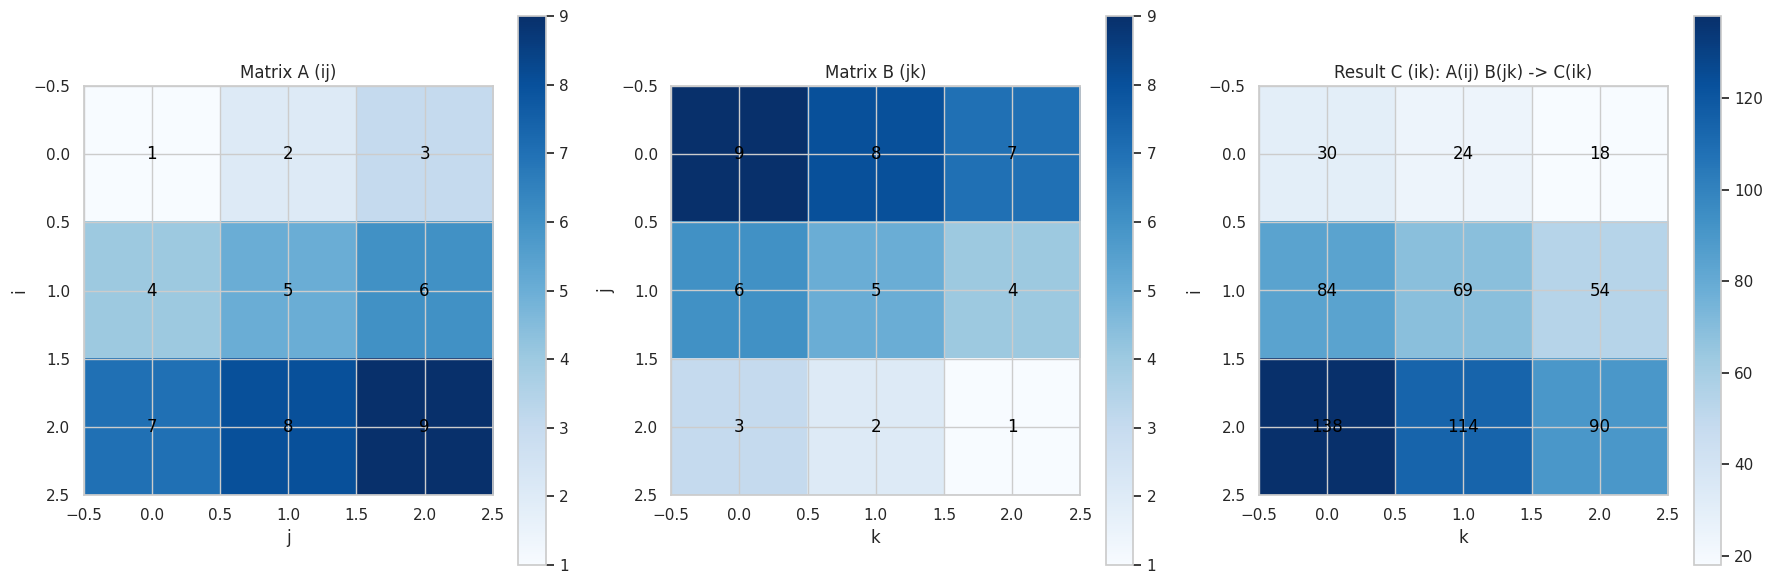

In [10]:
# Create a visual explanation of matrix multiplication with einsum
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Visualize matrix A
im1 = axs[0].imshow(A.numpy(), cmap='Blues')
axs[0].set_title('Matrix A (ij)')
axs[0].set_xlabel('j')
axs[0].set_ylabel('i')
plt.colorbar(im1, ax=axs[0])

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        axs[0].text(j, i, f'{A[i, j].item():.0f}', 
                   ha='center', va='center', color='black')

# Visualize matrix B
im2 = axs[1].imshow(B.numpy(), cmap='Blues')
axs[1].set_title('Matrix B (jk)')
axs[1].set_xlabel('k')
axs[1].set_ylabel('j')
plt.colorbar(im2, ax=axs[1])

for j in range(B.shape[0]):
    for k in range(B.shape[1]):
        axs[1].text(k, j, f'{B[j, k].item():.0f}', 
                   ha='center', va='center', color='black')

# Visualize result C = A @ B
C = torch.matmul(A, B)
im3 = axs[2].imshow(C.numpy(), cmap='Blues')
axs[2].set_title('Result C (ik): A(ij) B(jk) -> C(ik)')
axs[2].set_xlabel('k')
axs[2].set_ylabel('i')
plt.colorbar(im3, ax=axs[2])

for i in range(C.shape[0]):
    for k in range(C.shape[1]):
        axs[2].text(k, i, f'{C[i, k].item():.0f}', 
                   ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## Understanding einsum Notation

In `torch.einsum`, the notation works as follows:

`torch.einsum(equation, *operands)` where:
- `equation` is a string describing the operation
- `operands` are the tensors involved in the operation

The equation has the format: `subscripts->output` where:
- `subscripts` describes the dimensions of the input tensors
- `->` separates inputs from output
- `output` describes the dimensions of the output tensor

For example, in `ij,jk->ik`:
- `ij` represents the dimensions of the first tensor (a matrix)
- `jk` represents the dimensions of the second tensor (another matrix)
- `->ik` indicates that the output will have dimensions corresponding to i and k
- The repeated index `j` is summed over

Let's visualize one more example to reinforce understanding:


Outer product shape: torch.Size([3, 3])
Outer product:
 tensor([[ 4,  5,  6],
        [ 8, 10, 12],
        [12, 15, 18]])


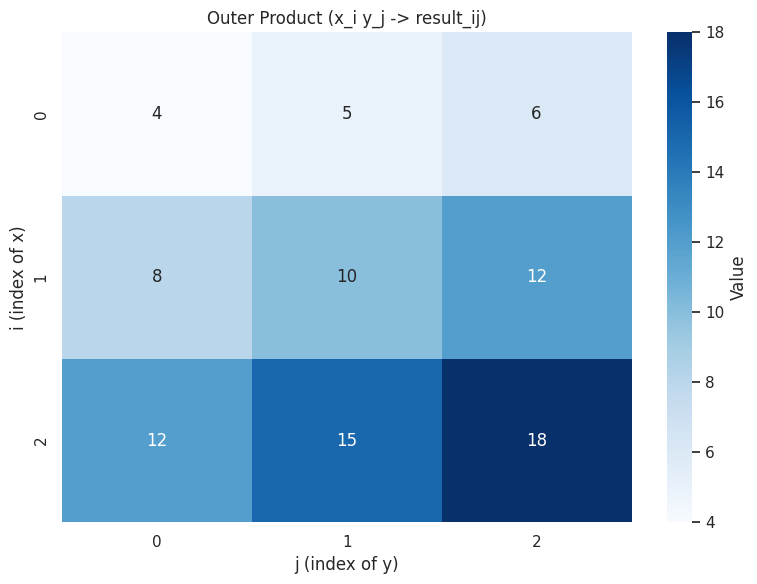

In [11]:
# Outer product example
outer_product = torch.einsum('i,j->ij', x, y)
print("Outer product shape:", outer_product.shape)
print("Outer product:\n", outer_product)

# Visualize outer product
plt.figure(figsize=(8, 6))
sns.heatmap(outer_product.numpy(), annot=True, cmap='Blues', fmt=".0f",
            cbar_kws={'label': 'Value'})
plt.title('Outer Product (x_i y_j -> result_ij)')
plt.xlabel('j (index of y)')
plt.ylabel('i (index of x)')
plt.tight_layout()
plt.show()


## Summary

In this introduction, we've:

1. Explored tensors of different ranks and their visualizations
2. Learned about basic tensor operations and indexing
3. Introduced Einstein notation and its basic rules
4. Demonstrated how to use `torch.einsum` for various operations
5. Visualized operations to build intuition

In the next notebook, we'll dive deeper into more complex tensor operations using Einstein notation and explore real-world applications.